# Bank Account Fraud Dataset neurips 2022
<br>
The data set was downloaded from https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022 at 12:41 PM 1/4/2022. 

In [1]:
import swat
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Load in the dataset from the Local directory on my machine.

In [2]:
df = pd.read_csv("C:/Users/matth/OneDrive/Desktop/Education/Base.csv")

Let us now get some information like column counts, null values per column and data types of each column in the pandas DataFrame.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [4]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


How many fraudulant examples do we have?

In [5]:
print("{:.2f}% of the examples are fradulant.".format((df['fraud_bool'].sum()/ len(df['fraud_bool']) * 100)))

1.10% of the examples are fradulant.


Let us now encode some dummy variables for some nominal categorical type data.

In [6]:
df = pd.get_dummies(data=df, columns=['payment_type','employment_status','housing_status','source'])

In [7]:

# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# df['device_os'] = le.fit_transform(df['device_os'])

In [8]:
# ss = StandardScaler()
# df = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
# TODO: Scale the data and compare tse visualizations

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 49 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   zip_count_4w                      1000000 non-null  int64  
 9   velocity_6h                       1000000 non-null  float64
 10  velocity_24h                      1000000 non-null  float64
 11  velocity_4w                       1000

# Machine Learning Section
We will perform Machine Learning with the target of 'device_os_' type. 

In [10]:
# Memory with full dataset is ~3TB..
minimize_dataset_memory = 1000000

# X.shape, y.shape

values = ['device_os']
predictors =  [i for i in df.columns.values.tolist() if i not in values]
target = 'device_os'
X = df[predictors].values
y = df[target].values
X = X[:minimize_dataset_memory, :]
y = y[:minimize_dataset_memory]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

MultiClassification Logistic Regression without gradient descent.

In [11]:
def softmax(x):
    n = np.exp(x) 
    d = np.sum(n)
    return n/d
# # making predictions
# B = np.random.rand(X1.shape[1],y.shape[1])
# pred = X1.dot(B)
class MultipleLogRegression:
    # softmax
    def __init__(self,learning_rate=0.1,n_iters=1000):
        self.lr=learning_rate
        self.iters=n_iters
        self.W=None
        
    def fit(self,X,y,mu):
        features=np.c_[np.ones(X.shape[0]), X]
        onehot_encoder = OneHotEncoder(sparse=False)
        y_encode=onehot_encoder.fit_transform(y.reshape(-1,1))
        self.W=np.zeros((features.shape[1], y_encode.shape[1]))
        samples=X.shape[0]
        
        for i in range(self.iters):
            Z=-features@self.W
            prob_y=softmax(Z)
            error=y_encode-prob_y
            dW=1/samples * (features.T @ error) + 2 * mu * self.W
            self.W-=self.lr*dW
            
    def predict(self,X):
        # augment the data
        features = np.c_[np.ones(X.shape[0]), X]
        Z=-features@self.W
        y=softmax(Z)
        return np.argmax(y,axis=1)
clf_ = MultipleLogRegression()
clf_.fit(X_train, y_train, 0.01)
y_pred = clf_.predict(X_test)
accuracy = (y_test == y_pred).mean()
print("Accuracy for Multiclassification: {:.2f}".format(accuracy))

MultiClassification Logistic Regression with gradient descent.

In [ ]:
from scipy.special import softmax

onehot_encoder = OneHotEncoder(sparse=False)
def loss(X, Y, W):
    """
    Y: onehot encoded
    """
    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

def gradient(X, Y, W, mu):
    """
    Y: onehot encoded 
    """
    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd

def gradient_descent(X, Y, max_iter=1000, eta=0.01, mu=0.01):
    """
    Very basic gradient descent algorithm with fixed eta and mu
    """
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_onehot, W, mu)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

class Multiclass:
    def fit(self, X, y):
        self.loss_steps, self.W = gradient_descent(X, y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)

clf__ = Multiclass()
clf__.fit(X_train,y_train)
y_pred = clf__.predict(X_test)
print(y_pred[:10])
accuracy = (y_test == y_pred).mean()
print("Accuracy for Multiclassification: {:.2f}".format(accuracy))

MemoryError: Unable to allocate 3.57 TiB for an array with shape (700000, 700000) and data type float64

In [ ]:
X = StandardScaler().fit_transform(X)
# augment the data
X1 = np.c_[np.ones(X.shape[0]), X]

softmax

In [ ]:
def softmax(x):
    n = np.exp(x) 
    d = np.sum(n)
    return n/d
# making predictions
B = np.random.rand(X1.shape[1],y.shape[1])
pred = X1.dot(B)

IndexError: tuple index out of range

Apply softmax to each row so that the values in each row sum to 1.

In [ ]:
pred = np.apply_along_axis(softmax,1,pred)
print(pred[:5])

NameError: name 'pred' is not defined

In [ ]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
# from sklearn import linear_model
# clf = linear_model.Lasso(alpha=0.1)

# try and predict the device??? 
#  27  device_os_linux                    1000000 non-null  uint8  
#  28  device_os_macintosh               1000000 non-null  uint8  
#  29  device_os_other                   1000000 non-null  uint8  
#  30  device_os_windows                 1000000 non-null  uint8  
#  31  device_os_x11                     1000000 non-null  uint8

0.38421285714285713


C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred, labels=['linux', 'macintosh', 'other', 'windows', 'x11'])
print(confusion_matrix)

ValueError: At least one label specified must be in y_true

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       linux       0.39      0.54      0.45     99785
   macintosh       0.00      0.00      0.00     16166
       other       0.38      0.47      0.42    103018
     windows       0.38      0.17      0.24     78877
         x11       0.00      0.00      0.00      2154

    accuracy                           0.39    300000
   macro avg       0.23      0.24      0.22    300000
weighted avg       0.36      0.39      0.36    300000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We see that for the prediction macintosh and x11, we see that we never make any predictions meaning that our data must be upsampled before splitting into training and test sets so that we have an equal number of categories within our target variable. 

In [ ]:
from sklearn.utils import shuffle
X, y = shuffle(X,y,random_state=42)
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

              precision    recall  f1-score   support

       linux       0.39      0.55      0.45     99863
   macintosh       0.00      0.00      0.00     16257
       other       0.39      0.44      0.41    103068
     windows       0.37      0.19      0.25     78656
         x11       0.00      0.00      0.00      2156

    accuracy                           0.39    300000
   macro avg       0.23      0.24      0.22    300000
weighted avg       0.36      0.39      0.36    300000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# For reproducability of the results
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])

In [ ]:
pca = PCA(n_components=3)
pca_results = pca.fit_transform(df[predictors].values)
df['pca-one'] = pca_results[:,0]
df['pca-two'] = pca_results[:,1] 
df['pca-three'] = pca_results[:,2]

In [ ]:
print('Explained variance per Principal Component: {}'.format(pca.explained_variance_ratio_))

Explained variance per Principal Component: [0.72539871 0.13485358 0.07043515]


C:\Users\matth\AppData\Local\Temp\ipykernel_17328\55688313.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


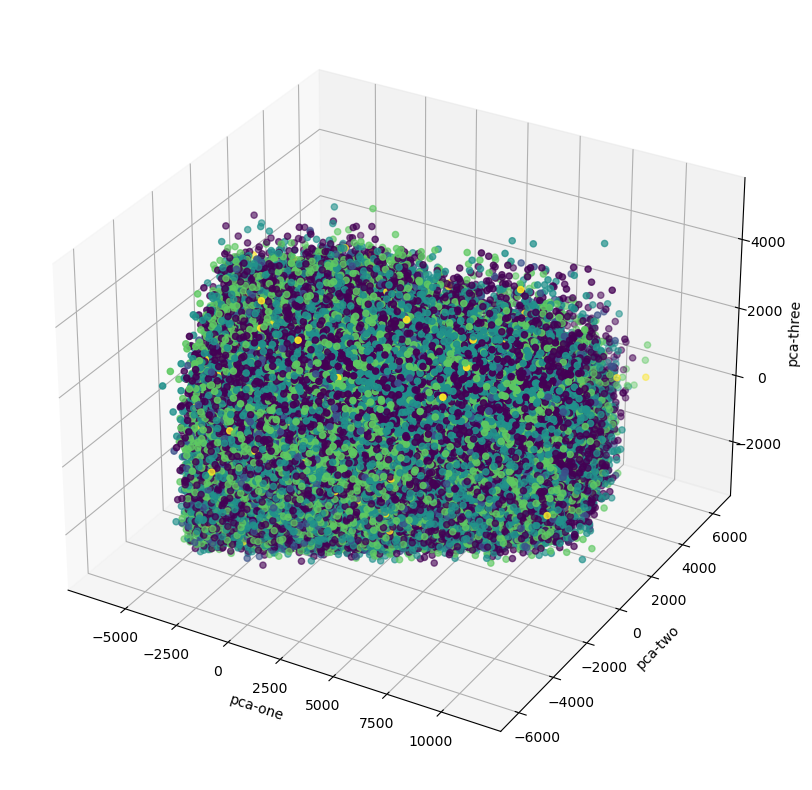

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:][target], 
    cmap='viridis'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
N = 10000

df_subset = df.loc[rndperm[:N],:].copy()

data_subset = df_subset[predictors].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.72766466 0.13304837 0.07185182]


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


C:\Users\matth\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 3.249s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 456.915612
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.518692
[t-SNE] KL divergence after 300 iterations: 2.758242
t-SNE done! Time elapsed: 14.742249011993408 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

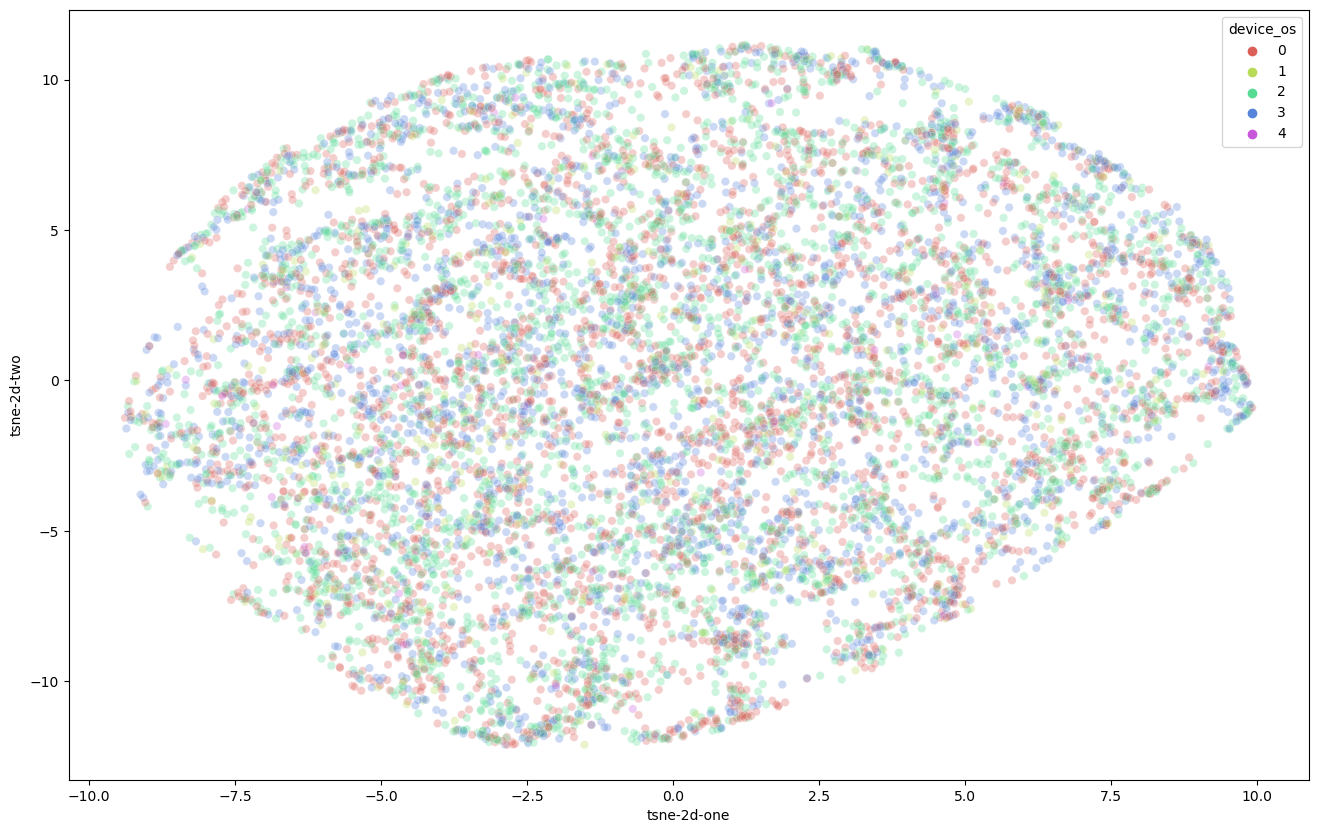

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=target,
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

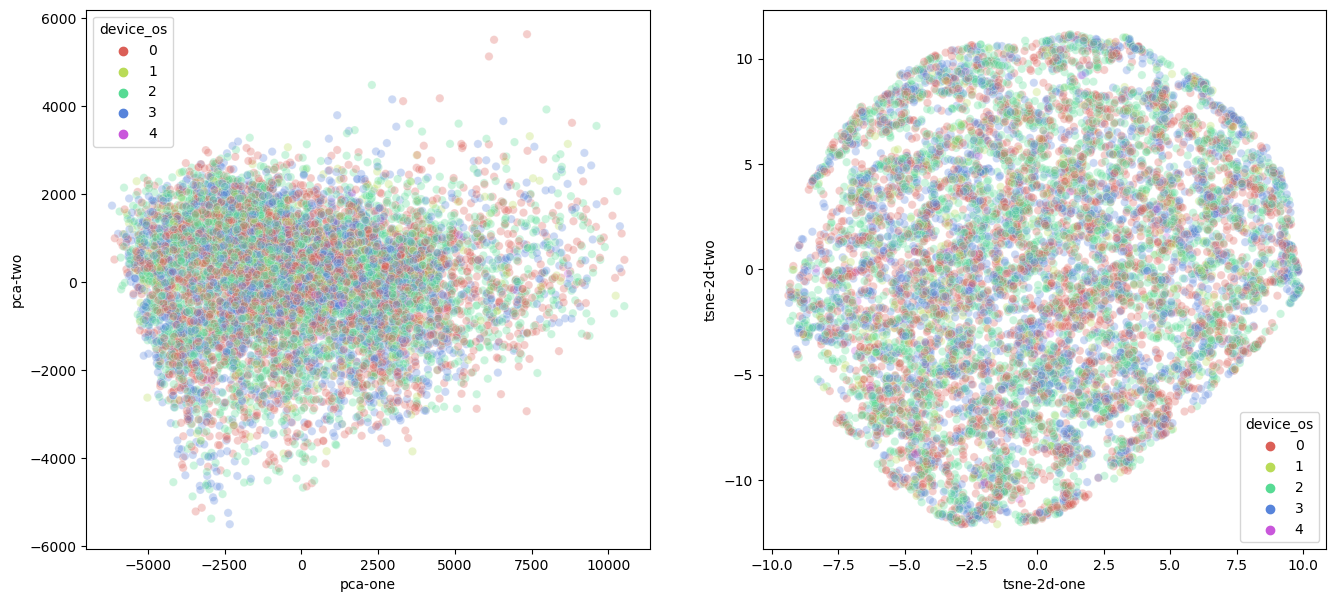

In [ ]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=target,
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=target,
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

C:\Users\matth\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

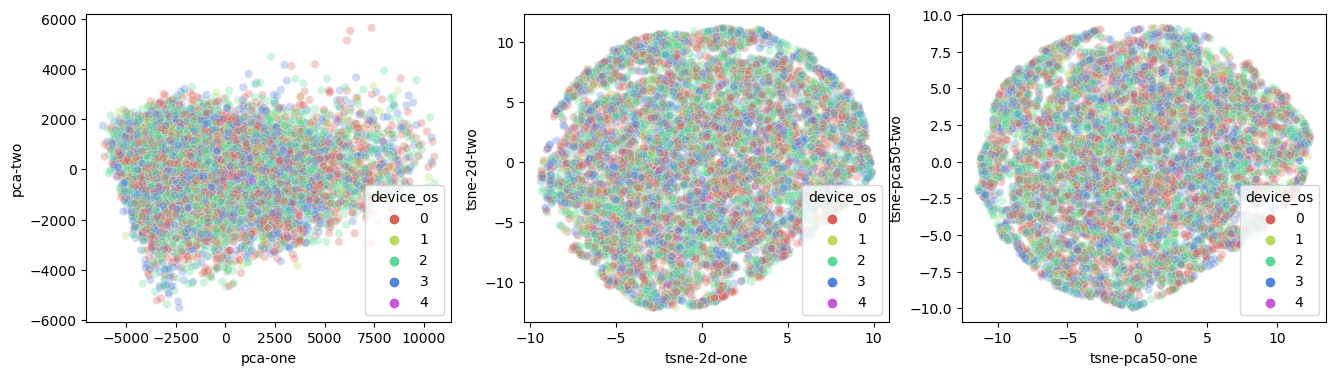

In [ ]:
pca_50 = PCA(n_components=48)
pca_result_50 = pca_50.fit_transform(data_subset)

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=target,
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=target,
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue=target,
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)